In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("classic")

In [2]:
data = pd.read_csv("ds_salaries.csv", index_col=False)

In [3]:
data.drop(data.columns[0], axis=1, inplace=True)

In [4]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
# avg salary in specific years
year = pd.unique(data['work_year'])
years = year.tolist()
year_list = [str(year) for year in years]

In [7]:
salary = data[['work_year', 'salary_in_usd']]
salary_by_year = salary.groupby(salary['work_year']).mean()
salary_by_year = pd.DataFrame(salary_by_year).reset_index()
salary_by_year['salary_in_usd'] = np.around(salary_by_year['salary_in_usd'], 2)

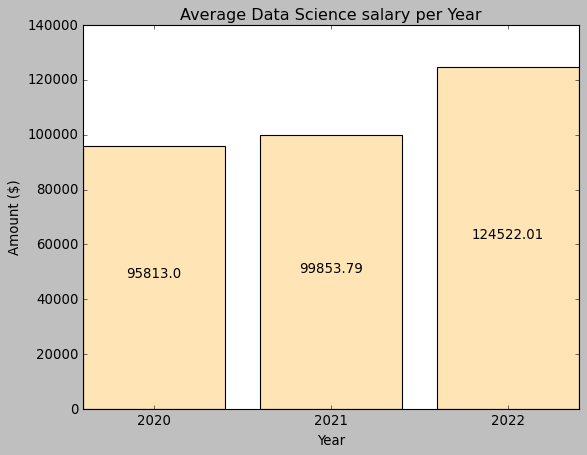

In [8]:
# plot average salary by year

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
x = year_list
y = salary_by_year['salary_in_usd']
plt.bar(x, y, color="moccasin")
addlabels(x, y)
plt.title("Average Data Science salary per Year")
plt.xlabel("Year")
plt.ylabel("Amount ($)")

plt.show()

In [9]:
# average salary in years per experience level

pd.unique(data['experience_level'])

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [10]:
def yearly_salary(data, experience_level):
    level_data = data[data['experience_level'] == experience_level]
    level_data = level_data[['work_year', 'salary_in_usd']]
    level_data = level_data.groupby(level_data['work_year']).mean()
    level_data = pd.DataFrame(level_data).reset_index()
    level_data['salary_in_usd'] = np.around(level_data['salary_in_usd'], 2)
    return level_data

In [11]:
entry = yearly_salary(data=data, experience_level='EN')
mid = yearly_salary(data=data, experience_level='MI')
senior = yearly_salary(data=data, experience_level='SE')
executive = yearly_salary(data=data, experience_level='EX')

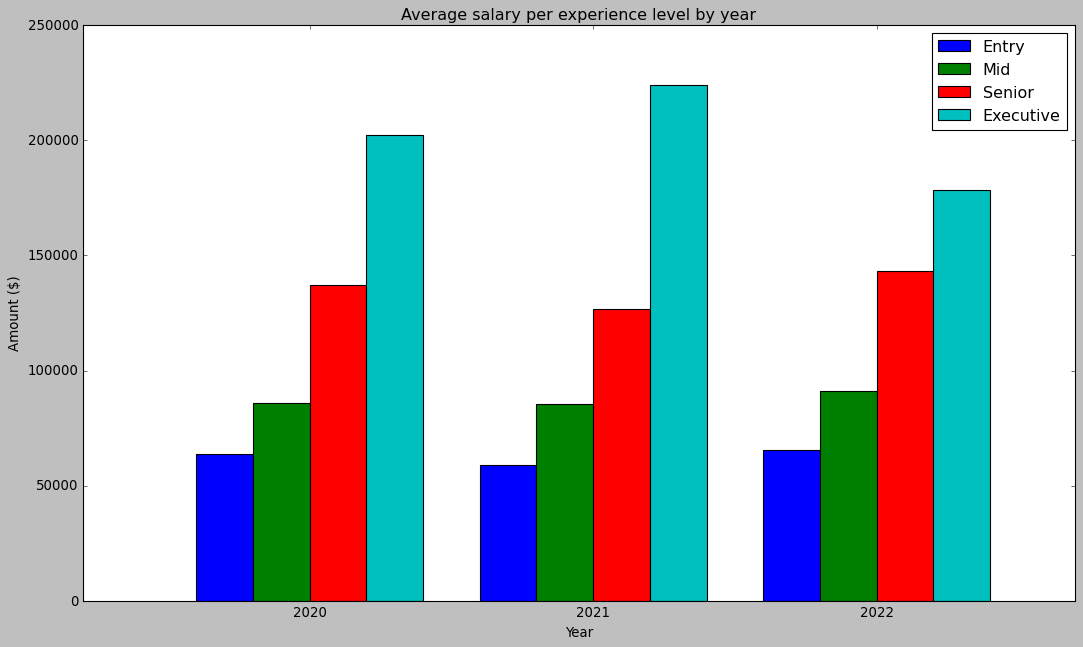

In [15]:
x = np.arange(len(year_list))
w = 0.2
plt.figure(figsize=(16,9))
plt.bar(x, entry['salary_in_usd'], width=w, label='Entry')
plt.bar(x+w, mid['salary_in_usd'], width=w, label='Mid')
plt.bar(x+w*2, senior['salary_in_usd'], width=w, label='Senior')
plt.bar(x+w*3, executive['salary_in_usd'], width=w, label='Executive')
plt.xticks(x+(w+(w/2)), year_list)
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Average salary per experience level by year')
plt.legend()

